Optimization terminated successfully.
         Current function value: 0.000912
         Iterations: 135
         Function evaluations: 139
         Gradient evaluations: 139
         Current function value: 0.029539
         Iterations: 143
         Function evaluations: 235
         Gradient evaluations: 223
         Current function value: 0.001458
         Iterations: 139
         Function evaluations: 201
         Gradient evaluations: 189
Optimization terminated successfully.
         Current function value: 0.015603
         Iterations: 175
         Function evaluations: 180
         Gradient evaluations: 180
Optimization terminated successfully.
         Current function value: 0.001764
         Iterations: 155
         Function evaluations: 159
         Gradient evaluations: 159
Optimization terminated successfully.
         Current function value: 0.003936
         Iterations: 167
         Function evaluations: 173
         Gradient evaluations: 173
         Current function 

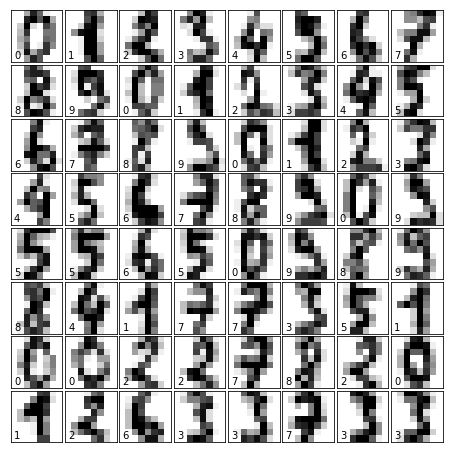

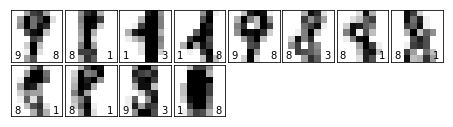

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from scipy.optimize import minimize
from scipy.optimize import fmin_bfgs

def Sigmoid(z):
    return 1/(1+np.exp(-z))
def CostFunction(theta,X,y,lamda):
    #print("x",np.shape(X))  (1797,65)
    #print("c",np.shape(theta))
    theta = np.reshape(theta,(65,1))
    h = Sigmoid(np.dot(X,theta))
    #print(h)
    #print(np.shape(h)) # h(1797, ) theta(65, ) X(1797,65)
    #print(len(X))
    #print(len(theta[1:-1,:]))
    reg = (lamda / (2 * len(X))) * np.dot(np.transpose(theta[1:,:]),theta[1:,:])
    #print(reg)
    #flag1
    J = (-np.dot(np.transpose(y),np.log(h)) - np.dot(np.transpose(1-y),np.log(1-h)))/len(X)
    #print(J)
    #print(reg)
    return J+reg
def gradient(theta, X, y, lamda):
    #print(np.shape(theta))
    #parameters = int(theta.ravel().shape[1])
    theta = np.reshape(theta,(65,1))
    #print(np.shape(X),np.shape(theta),np.shape(y))
    h = Sigmoid(np.dot(X,theta))
    error = h - y
    #print(np.shape(error))
    #print(np.shape(X),np.shape(theta),np.shape(h),np.shape(y),np.shape(error))
#     print(theta)
#     theta[0] = 0
    theta1 = theta.copy()
    theta1[0]=0
    #theta0=0
    grad = (np.dot(np.transpose(X),error) + lamda * theta)/len(X)
    return np.array(grad).ravel()
def OneVsAll(X, y, num_labels, lamda):
    #1797
    rows, params = X.shape
    #print(rows,params)
   
    # k* (n + 1) array for the parameters of each of the k classifiers   10 * 65
    all_theta = np.zeros((num_labels, params))
    # insert a column of ones at the beginning for the intercept term 在特征集的第一列插入
    # labels are 1-indexed instead of 0-indexed  10个标签，分别计算10个逻辑回归模型
    for i in range(num_labels):
        #65个参数
        theta = np.zeros((params,1))
        #print('params',params)
        #print(np.shape(theta))
        #转换成[1,0,0,0,0,0,0,0 .....]
        y_i = np.array([1 if label == i else 0 for label in y])
        #转置
        y_i = np.reshape(y_i, (rows, 1))
        #if i == 1: print(y_i)
        # minimize the objective function
        #fmin = minimize(fun=CostFunction, x0=theta, args=(X, y_i, lamda), method='TNC', jac=gradient)
        fmin = fmin_bfgs(CostFunction, theta, fprime=gradient, args=(X,y_i,lamda))
        #为当前分类标签，存储权重值
        all_theta[i,:] = fmin
    return all_theta

def predict_all(X, all_theta):
    rows = X.shape[0]
    params = X.shape[1]
    num_labels = all_theta.shape[0]
    # same as before, insert ones to match the shape
    # convert to matrices
    #X = np.matrix(X)
    #all_theta = np.matrix(all_theta)
    # compute the class probability for each class on each training instance  计算每个分类的概率
    h = Sigmoid(np.dot(X,np.transpose(all_theta)))
    print(h)
    # create array of the index with the maximum probability  
    h_argmax = np.argmax(h, axis=1)
    # because our array was zero-indexed we need to add one for the true label prediction
    # 为了和 data['y']  中的数据比较
    h_argmax = h_argmax
    return h_argmax


# load data
digits = load_digits()

# plot the digits
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

#plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary)
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
    
#logistic_regression
X = np.reshape(digits.images,(1797,64))
X = np.insert(X, 0, values=np.ones(1797), axis=1)
#print(np.shape(X))
lable = digits.target
#print(lable)
#start training
all_theta = OneVsAll(X,lable,10,1)
#print(all_theta)
#模型评判
y_pred = predict_all(X, all_theta)
print(y_pred,lable)
correct = [1 if a == b else 0 for (a, b) in zip(y_pred, lable)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print ('accuracy = {0}%'.format(accuracy * 100))


#可视化错误样本
fig2 = plt.figure(figsize=(6, 6))  # figure size in inches
fig2.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

j=0
for i in range(len(y_pred)):
    if y_pred[i] != lable[i]:
        ax = fig2.add_subplot(8, 8, j+1, xticks=[], yticks=[])
        j=j+1
        ax.imshow(digits.images[i], cmap=plt.cm.binary)
        # label the image with the target value
        ax.text(0, 7, str(digits.target[i]))
        ax.text(6, 7, str(y_pred[i]))

    



In [105]:
X = np.reshape(digits.images,(1797,64))
theta = np.zeros([65,1])
X = np.insert(X, 0, values=np.ones(1797), axis=1)
print(np.shape(X),np.shape(theta))
h = Sigmoid(np.dot(X,theta))

print(np.shape(h))
print(np.shape(i))

(1797, 65) (65, 1)
(1797, 1)
()


In [110]:
a = np.array([[1,2,3],
             [4,5,6]])
thet = np.zeros([3,1])

y = np.array([[1],
          [0]])
y - np.dot(a,thet)
print(np.shape(a),np.shape(y))
thet[:,0] = 0
print(thet)

(2, 3) (2, 1)
[[0.]
 [0.]
 [0.]]


In [104]:
np.zeros(2)


array([0., 0.])

In [116]:
theta = np.zeros([1,65])
np.shape(theta)

(1, 65)

In [64]:
a = np.array([[1],
             [2],
             [3]])
print(np.shape(a))
print(a[1:,:])
b=np.dot(np.transpose(a[1:,:]),a[1:])
print(b)
a[0]=0
print(a)

(3, 1)
[[2]
 [3]]
[[13]]
[[0]
 [2]
 [3]]
